# First Exploration of Fits Files of Monocam
================================================================

- date of creation : Thursday 26th 2016
- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS

Study images for LSST calibration group

In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
#config InlineBackend.rc = {}
#config Backend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")  # default config obtained from astropy examples
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from astropy.utils.data import download_file

In [3]:
from astropy.io import fits

In [4]:
import os

In [5]:
path='/Users/dagoret-campagnesylvie/iraf/MonoCamMay2016/20160509'

In [6]:
filename='bias_01.fits'

In [7]:
image_file=os.path.join(path,filename)

In [8]:
#header=fits.getheader(image_file)
fits.getheader(image_file)
#hdu_header = fits.PrimaryHDU(image_file)
#print header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    0 / number of axes                                 
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.4 build on May  6 2016 18:01:35.          
CTIME   =           1462842471 / exposure start (seconds since 1.1.1970)        
USEC    =               926250 / exposure start micro seconds                   
JD      =     2457518.54711806 / exposure JD                                    
DATE-OBS= '2016-05-10T01:07:51.926' / start of exposure                         
EXPOSURE=                   0. / exposure length in seconds                     
EXPTIME =                   0. / exposure length in seconds                     
INSTRUME= '113-03  '           / name of the data acqusition instrument         
TELESCOP= 'USNO 1.3m'       

In [9]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/dagoret-campagnesylvie/iraf/MonoCamMay2016/20160509/bias_01.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     554   ()              
1                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
2                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
3                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
4                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
5                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
6                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
7                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
8                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
9                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
10               ImageHDU        33   (544, 2048)   int16 (rescales

In [10]:
header=hdu_list[0].header
header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    0 / number of axes                                 
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.4 build on May  6 2016 18:01:35.          
CTIME   =           1462842471 / exposure start (seconds since 1.1.1970)        
USEC    =               926250 / exposure start micro seconds                   
JD      =     2457518.54711806 / exposure JD                                    
DATE-OBS= '2016-05-10T01:07:51.926' / start of exposure                         
EXPOSURE=                   0. / exposure length in seconds                     
EXPTIME =                   0. / exposure length in seconds                     
INSTRUME= '113-03  '           / name of the data acqusition instrument         
TELESCOP= 'USNO 1.3m'       

In [11]:
number_of_channels=header['CHAN']
print number_of_channels

16


In [12]:
image_data1 = hdu_list[1].data

In [13]:
image_data1.shape

(2048, 544)

In [14]:
#hdu_list.close()

In [15]:
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(2048, 544)


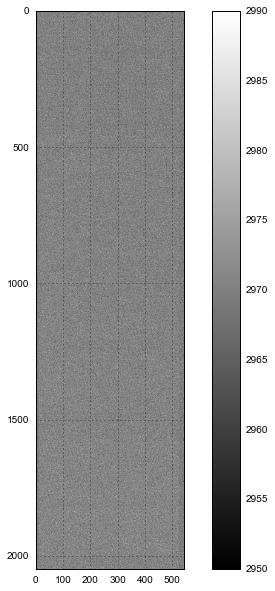

In [16]:
# Viewing the image data and getting basic statistics
plt.figure(figsize=(10,10))
plt.imshow(image_data1, cmap='gray',vmin=2950,vmax=2990)
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps


(2950, 3000)

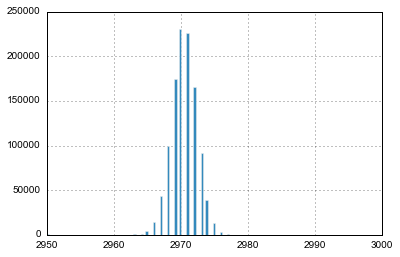

In [17]:
image_data2=image_data1.flatten()
plt.hist(image_data2,bins=1000);
plt.xlim(2950,3000)

In [18]:
def ShowImagesSet(path,filename):
    '''
    Shows the whole set of CCD images
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=header['CHAN']   # number of channels in the CCD
    
    NX=8 # number of images along the horizontal axis
    NY=2 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,sharex='col', sharey='row',figsize=(15,15)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.05,wspace=0.05)

    for index in range(0,number_of_channels,1):  
        ix=index%8
        iy=index/8
        image_data = hdu_list[index+1].data
        im=axarr[iy,ix].imshow(image_data, cmap='gray')  # plot the image
        #plt.colorbar(im, orientation='horizontal')
    hdu_list.close()

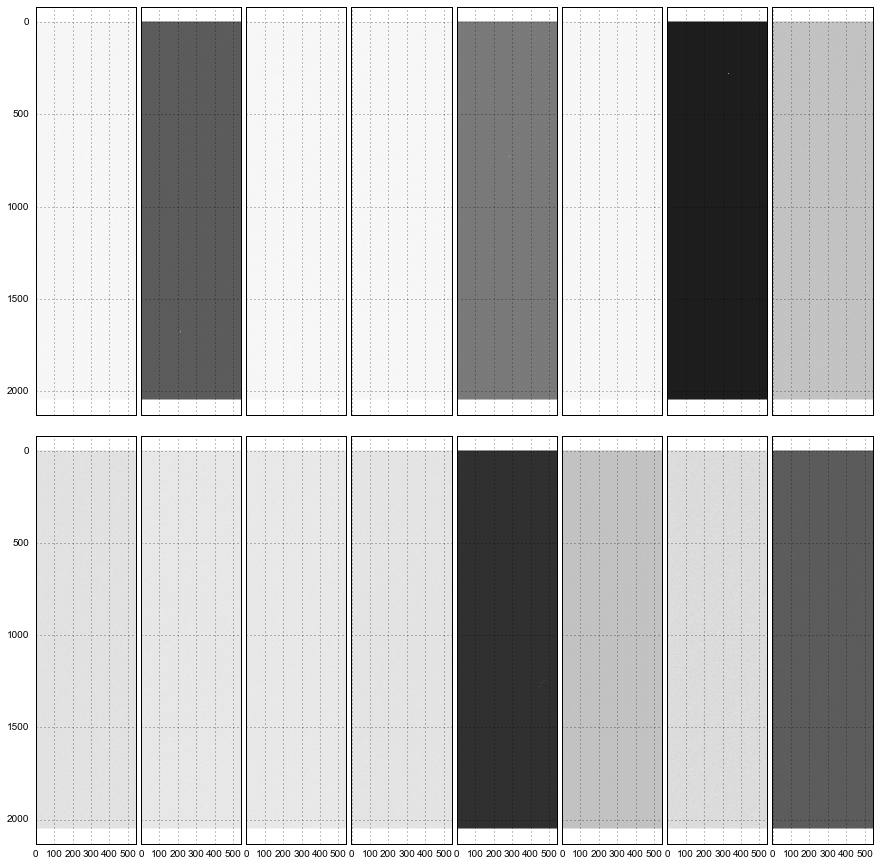

In [19]:
ShowImagesSet(path,image_file)

In [53]:
def ShowHistoSet(path,filename):
    '''
    Shows the whole set of CCD histograms
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=header['CHAN']   # number of channels in the CCD
    
    NX=4 # number of images along the horizontal axis
    NY=4 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,figsize=(20,20)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.5,wspace=0.5)

    for index in range(0,number_of_channels,1):  
        ix=index%4
        iy=index/4
        image_data = hdu_list[index+1].data
        data=image_data.flatten()
        axarr[iy,ix].hist(data,bins=100,normed=1,facecolor='blue', alpha=0.75)  # plot the image
        plt.xlim(2200,3800)
    hdu_list.close()
    plt.xlim(2200,3800)

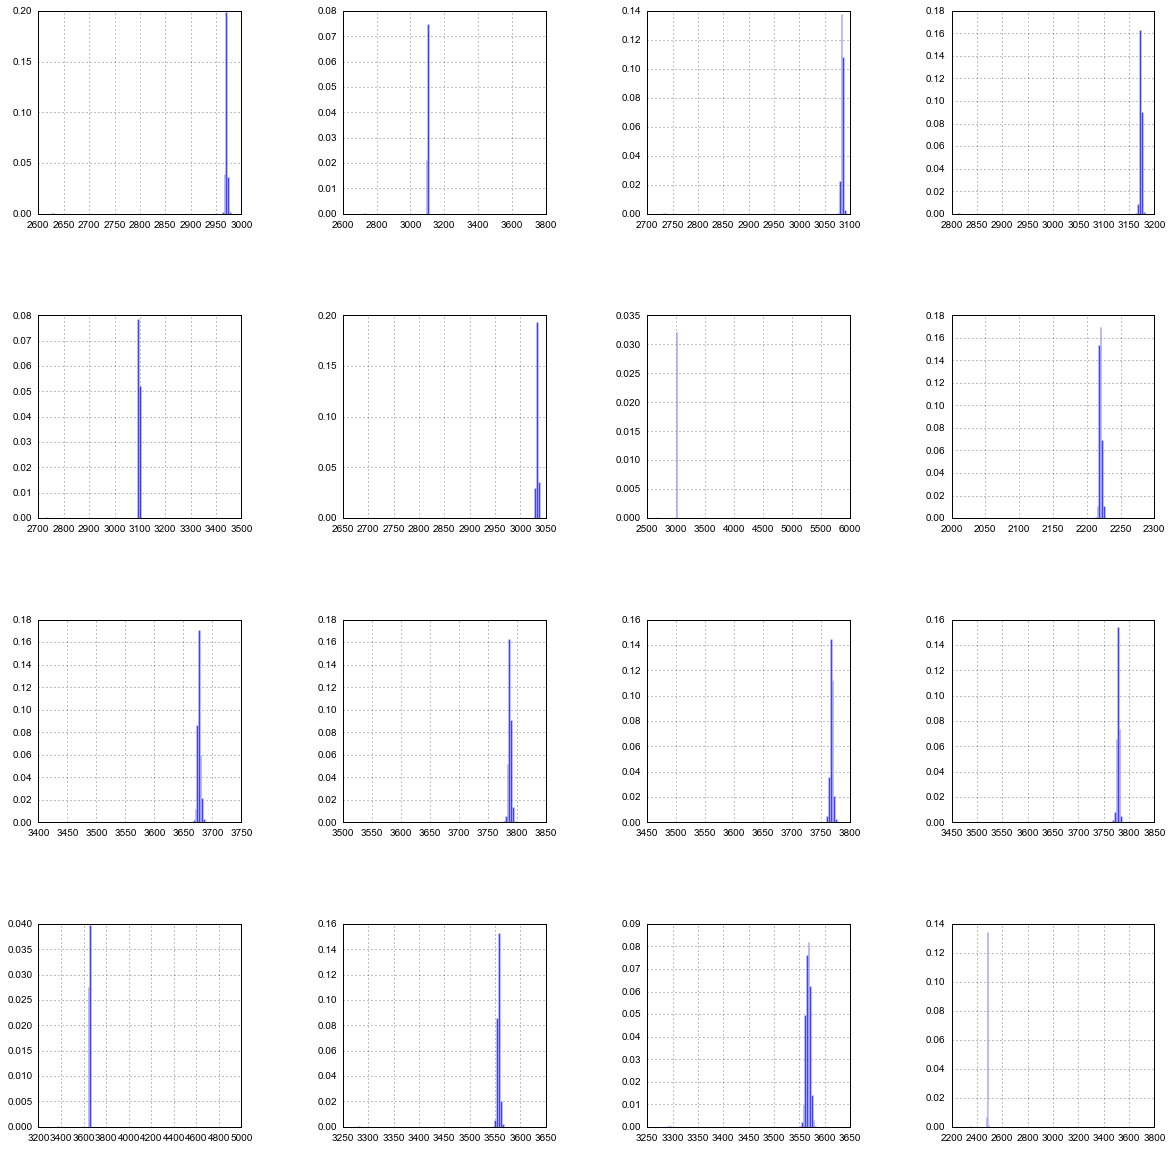

In [54]:
ShowHistoSet(path,image_file)